In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time
import random
from sklearn.decomposition import PCA
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split

temps_debut = time.time()

# Chemins des fichiers CSV et images
chemin_x_train = r'C:\Users\pc\Documents\Data Scientist\Rakuten_true\Data_rakuten\X_train_update.csv'
chemin_y_train = r'C:\Users\pc\Documents\Data Scientist\Rakuten_true\Data_rakuten\Y_train_CVw08PX.csv'
chemin_images = r'C:\Users\pc\Documents\Data Scientist\Rakuten_true\Data_rakuten\images\image_train'

X_l1 = pd.read_csv(chemin_x_train, index_col='Unnamed: 0')
y_l1 = pd.read_csv(chemin_y_train, index_col='Unnamed: 0')

data = pd.merge(X_l1, y_l1, left_index=True, right_index=True)
data.drop(['designation', 'description'], axis=1, inplace=True)

image_size = (224, 224)
images = []
labels = []


In [2]:
nombre_images_a_lire = 1000
#images_selectionnees = random.sample(os.listdir(chemin_images), nombre_images_a_lire)
images_selectionnees = os.listdir(chemin_images)

images = []
labels = []

for nom_fichier in images_selectionnees:
    chemin_image = os.path.join(chemin_images, nom_fichier)
    imageid = nom_fichier.split("_")[1]
    productid = nom_fichier.split("_")[3].split(".")[0]
    
    row = data.loc[(data['imageid'] == int(imageid)) & (data['productid'] == int(productid))]
    
    image = cv2.imread(chemin_image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    kernelx = cv2.getDerivKernels(1, 0, 3)
    kernely = cv2.getDerivKernels(0, 1, 3)
    prewitt_x = cv2.filter2D(blurred, -1, kernelx[0] * kernelx[1].T)
    prewitt_y = cv2.filter2D(blurred, -1, kernely[0] * kernely[1].T)
    prewitt_cross = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)
    contours, _ = cv2.findContours(prewitt_cross, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)
    
    bounding_boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))
    
    if bounding_boxes:
        bounding_boxes_array = np.array(bounding_boxes)
        min_x, min_y, min_w, min_h = np.min(bounding_boxes_array, axis=0)
        max_x, max_y, max_w, max_h = np.max(bounding_boxes_array, axis=0)
    else:
        min_x, min_y, min_w, min_h = 0, 0, 0, 0
        max_x, max_y, max_w, max_h = 500, 500, 500, 500
    
    cropped_image = image[min_y:min_y+max_h, min_x:min_x+max_w]
    rgb_cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(rgb_cropped_image, image_size)
    images.append(resized_image)
    labels.append(row['prdtypecode'].values[0])



In [3]:
np.save(r'C:\Users\pc\Documents\Data Scientist\Rakuten_true\Data_rakuten\images\images.npy', images)
np.save(r'C:\Users\pc\Documents\Data Scientist\Rakuten_true\Data_rakuten\images\labels.npy', labels)

In [4]:
X = np.array(images)
y = np.array(labels)

print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (84916, 224, 224, 3)
Dimensions de y: (84916,)


In [5]:
del images

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=23, stratify=y)

print("Dimensions de X_train:", X_train.shape)
print("Dimensions de y_train:", y_train.shape)
print("Dimensions de X_test:", X_test.shape)
print("Dimensions de y_test:", y_test.shape)
classes, counts = np.unique(y_train, return_counts=True)
for cls, count in zip(classes, counts):
    print(f"Classe {cls}: {count} images")

Dimensions de X_train: (56044, 224, 224, 3)
Dimensions de y_train: (56044,)
Dimensions de X_test: (28872, 224, 224, 3)
Dimensions de y_test: (28872,)
Classe 10: 2057 images
Classe 40: 1655 images
Classe 50: 1109 images
Classe 60: 549 images
Classe 1140: 1763 images
Classe 1160: 2609 images
Classe 1180: 504 images
Classe 1280: 3214 images
Classe 1281: 1366 images
Classe 1300: 3330 images
Classe 1301: 533 images
Classe 1302: 1644 images
Classe 1320: 2139 images
Classe 1560: 3348 images
Classe 1920: 2840 images
Classe 1940: 530 images
Classe 2060: 3295 images
Classe 2220: 544 images
Classe 2280: 3142 images
Classe 2403: 3151 images
Classe 2462: 938 images
Classe 2522: 3293 images
Classe 2582: 1709 images
Classe 2583: 6738 images
Classe 2585: 1647 images
Classe 2705: 1822 images
Classe 2905: 575 images


In [7]:
chemin_images = r'C:\Users\pc\Documents\Data Scientist\Rakuten_true\Data_rakuten\images'
np.save(chemin_images + '\\X_train.npy', X_train)
np.save(chemin_images + '\\y_train.npy', y_train)
np.save(chemin_images + '\\X_test.npy', X_test)
np.save(chemin_images + '\\y_test.npy', y_test)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time
import random
from sklearn.decomposition import PCA
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
chemin_images = r'C:\Users\pc\Documents\Data Scientist\Rakuten_true\Data_rakuten\images'

X_train = np.load(chemin_images + '\\X_train.npy')
y_train = np.load(chemin_images + '\\y_train.npy')

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

classes, counts = np.unique(y_train, return_counts=True)
target_count = 1000

# Initialiser les listes pour les nouvelles images et étiquettes
augmented_images = []
augmented_labels = []

# Parcourir chaque classe et appliquer la data augmentation si nécessaire
for classe, count in zip(classes, counts):
    indices = np.where(y_train == classe)[0]
    if count < target_count:
        # Sélectionner les images de cette classe
        images_to_augment = X_train[indices]
        labels_to_augment = y_train[indices]
        
        # Calculer le nombre d'images supplémentaires à générer
        num_augmented_images = target_count - count
        
        # Appliquer la data augmentation pour générer de nouvelles images
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest')
        
        for X_batch, y_batch in datagen.flow(images_to_augment, labels_to_augment, batch_size=num_augmented_images):
            augmented_images.extend(X_batch)
            augmented_labels.extend(y_batch)
            break  # Arrêter après avoir généré le nombre nécessaire d'images
    else:
        # Sélectionner aléatoirement 2000 indices
        selected_indices = np.random.choice(indices, size=target_count, replace=False)
        
        # Extraire les images correspondantes
        selected_images = X_train[selected_indices]
        selected_labels = y_train[selected_indices]
        
        # Ajouter les images et les étiquettes sélectionnées
        augmented_images.extend(selected_images)
        augmented_labels.extend(selected_labels)

In [6]:
import tensorflow as tf
import numpy as np

chemin_images = r'C:\Users\pc\Documents\Data Scientist\Rakuten_true\Data_rakuten\images'
# Redimensionner chaque image augmentée à la taille de X_train
# augmented_images_resized = [tf.image.resize(image, (X_train.shape[1], X_train.shape[2])) for image in augmented_images]

np.save(chemin_images + '\\augmented_images.npy', augmented_images_resized)
np.save(chemin_images + '\\augmented_labels.npy', augmented_labels)

In [9]:
print(augmented_images_resized[0].shape)
print(len(augmented_images_resized))

(224, 224, 3)
22827


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import time
import random
from sklearn.decomposition import PCA
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split

chemin_images = r'C:\Users\pc\Documents\Data Scientist\Rakuten_true\Data_rakuten\images'
#augmented_images = np.load(chemin_images + '\\augmented_images.npy')
#augmented_labels = np.load(chemin_images + '\\augmented_labels.npy')

X_train = np.load(chemin_images + '\\X_train.npy')
y_train = np.load(chemin_images + '\\y_train.npy')
X_test = np.load(chemin_images + '\\X_test.npy')
y_test = np.load(chemin_images + '\\y_test.npy')

In [2]:
import tensorflow as tf
import numpy as np

# Concaténer les données
X_train_augmented = np.concatenate([X_train] + [np.expand_dims(image, axis=0) for image in augmented_images], axis=0)
y_train_augmented = np.concatenate([y_train] + augmented_labels)

# Vérifier les dimensions
print(X_train_augmented.shape)
print(y_train_augmented.shape)

MemoryError: Unable to allocate 44.2 GiB for an array with shape (78871, 224, 224, 3) and data type float32

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import f1_score


num_classes = len(np.unique(y_train))
print(num_classes)

# Définition de la taille de l'image d'entrée
input_shape = (224, 224, 3)

# Chargement du modèle ResNet50 pré-entraîné sans inclure les couches fully connected
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Congélation des couches du modèle de base
base_model.trainable = False

# Création des couches supplémentaires pour l'adaptation
x = layers.Conv2D(64, (3, 3), activation='relu')(base_model.output)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(num_classes, activation='softmax')(x)

# Création du modèle complet
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Affichage de la structure du modèle
model.summary()


27


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,803,803 (94.62 MB)

 Trainable params: 1,216,091 (4.64 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [4]:
# Décompte du nombre d'observations par étiquette dans les données d'entraînement
classes_train, counts_train = np.unique(y_train, return_counts=True)
print("Décompte des observations par étiquette dans les données d'entraînement:")
for label, count in zip(classes_train, counts_train):
    print("Étiquette:", label, "- Nombre d'observations:", count)

# Décompte du nombre d'observations par étiquette dans les données de test
classes_test, counts_test = np.unique(y_test, return_counts=True)
print("\nDécompte des observations par étiquette dans les données de test:")
for label, count in zip(classes_test, counts_test):
    print("Étiquette:", label, "- Nombre d'observations:", count)


Décompte des observations par étiquette dans les données d'entraînement:
Étiquette: 10 - Nombre d'observations: 2057
Étiquette: 40 - Nombre d'observations: 1655
Étiquette: 50 - Nombre d'observations: 1109
Étiquette: 60 - Nombre d'observations: 549
Étiquette: 1140 - Nombre d'observations: 1763
Étiquette: 1160 - Nombre d'observations: 2609
Étiquette: 1180 - Nombre d'observations: 504
Étiquette: 1280 - Nombre d'observations: 3214
Étiquette: 1281 - Nombre d'observations: 1366
Étiquette: 1300 - Nombre d'observations: 3330
Étiquette: 1301 - Nombre d'observations: 533
Étiquette: 1302 - Nombre d'observations: 1644
Étiquette: 1320 - Nombre d'observations: 2139
Étiquette: 1560 - Nombre d'observations: 3348
Étiquette: 1920 - Nombre d'observations: 2840
Étiquette: 1940 - Nombre d'observations: 530
Étiquette: 2060 - Nombre d'observations: 3295
Étiquette: 2220 - Nombre d'observations: 544
Étiquette: 2280 - Nombre d'observations: 3142
Étiquette: 2403 - Nombre d'observations: 3151
Étiquette: 2462 - No

In [8]:
unique_labels = np.unique(y_train)
print("Valeurs uniques des étiquettes :", unique_labels)
label_mapping = {10: 0, 40: 1, 50: 2, 60: 3, 1140: 4, 1160: 5, 1180: 6, 1280: 7, 1281: 8,
                 1300: 9, 1301: 10, 1302: 11, 1320: 12, 1560: 13, 1920: 14, 1940: 15, 
                 2060: 16, 2220: 17, 2280: 18, 2403: 19, 2462: 20, 2522: 21, 2582: 22, 
                 2583: 23, 2585: 24, 2705: 25, 2905: 26}

# Remapper les étiquettes dans les ensembles de données
y_train_mapped = np.vectorize(label_mapping.get)(y_train)
y_test_mapped = np.vectorize(label_mapping.get)(y_test)

# Afficher les valeurs uniques des étiquettes remappées
print("Valeurs uniques des étiquettes remappées :", np.unique(y_train_mapped))

Valeurs uniques des étiquettes : [  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]
Valeurs uniques des étiquettes remappées : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [19]:
from keras.utils import to_categorical

num_classes = len(classes_train)
#X_train_normalized = X_train / 255.0
#X_test_normalized = X_test / 255.0

In [10]:

history = model.fit(X_train, y_train_mapped, epochs=10, validation_data=(X_test, y_test_mapped), batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test_mapped)
print("Loss:", loss)
print("Accuracy:", accuracy)



Epoch 1/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 5549s 3s/step - accuracy: 0.3401 - loss: 2.3754 - val_accuracy: 0.4409 - val_loss: 1.9141
Epoch 2/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 5045s 3s/step - accuracy: 0.4836 - loss: 1.7427 - val_accuracy: 0.4715 - val_loss: 1.8199
Epoch 3/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 5038s 3s/step - accuracy: 0.5299 - loss: 1.5604 - val_accuracy: 0.4863 - val_loss: 1.7951
Epoch 4/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 5017s 3s/step - accuracy: 0.5702 - loss: 1.4094 - val_accuracy: 0.4963 - val_loss: 1.8079
Epoch 5/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 4982s 3s/step - accuracy: 0.5978 - loss: 1.3079 - val_accuracy: 0.4964 - val_loss: 1.8278
Epoch 6/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 4996s 3s/step - accuracy: 0.6255 - loss: 1.1995 - val_accuracy: 0.4916 - val_loss: 1.8959
Epoch 7/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 5015s 3s/step - accuracy: 0.6526 - loss: 1.1124 - val_accuracy: 0.4879 - val_loss: 1.9455
Epoch 8/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 5014s 3s/step - accuracy: 0.6730 -

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\pc\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\pc\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\pc\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\pc\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\pc\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\pc\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\pc\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\pc\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\pc\AppData\Local\Temp\ipykernel_13496\3849649351.py", line 3, in <module>

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 437, in evaluate

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 166, in one_step_on_iterator

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 154, in one_step_on_data

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 85, in test_step

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 322, in compute_loss

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 605, in __call__

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 641, in call

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 42, in __call__

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 1714, in sparse_categorical_crossentropy

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 1554, in sparse_categorical_crossentropy

  File "C:\Users\pc\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 633, in sparse_categorical_crossentropy

Received a label value of 2705 which is outside the valid range of [0, 27).  Label values: 1302 1300 2582 2522 1320 2583 2522 2583 2583 2582 1300 2280 2705 2583 40 1560 1920 1320 1302 2060 1320 2583 2522 2403 1300 2403 2280 2060 2462 2585 1940 2280
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_284161]

In [11]:
loss, accuracy = model.evaluate(X_test, y_test_mapped)
print("Loss:", loss)
print("Accuracy:", accuracy)

903/903 ━━━━━━━━━━━━━━━━━━━━ 1650s 2s/step - accuracy: 0.4837 - loss: 2.2236
Loss: 2.2031748294830322
Accuracy: 0.4862496554851532


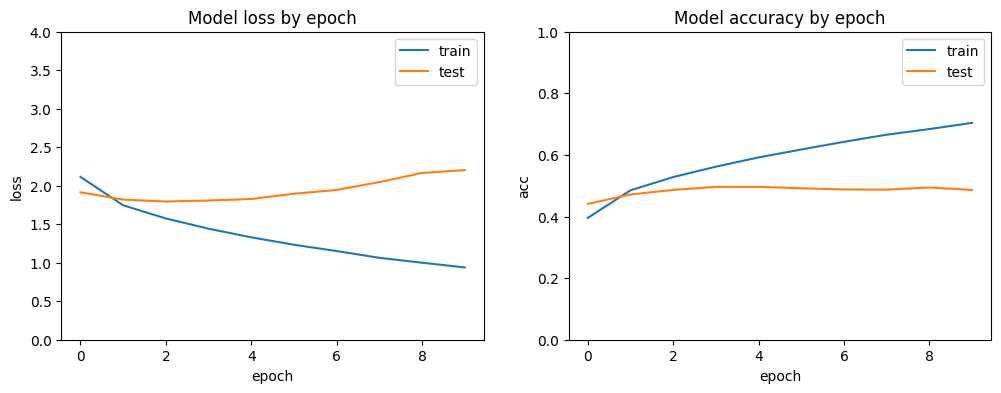

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.ylim(0, 4)  

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.ylim(0, 1)

plt.show()

In [24]:
training_loss_at_epoch_3 = history.history['loss'][2]  # loss à l'epoch 3
training_accuracy_at_epoch_3 = history.history['accuracy'][2]  # accuracy à l'epoch 3
validation_loss_at_epoch_3 = history.history['val_loss'][2]  # validation loss à l'epoch 3
validation_accuracy_at_epoch_3 = history.history['val_accuracy'][2]  # validation accuracy à l'epoch 3

# Afficher les performances à l'epoch 3
print("Training Loss at Epoch 3:", training_loss_at_epoch_3)
print("Training Accuracy at Epoch 3:", training_accuracy_at_epoch_3)
print("Validation Loss at Epoch 3:", validation_loss_at_epoch_3)
print("Validation Accuracy at Epoch 3:", validation_accuracy_at_epoch_3)

Training Loss at Epoch 3: 1.574473261833191
Training Accuracy at Epoch 3: 0.5280494093894958
Validation Loss at Epoch 3: 1.7951161861419678
Validation Accuracy at Epoch 3: 0.4863189160823822
